In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Use STIX font for matplotlib
plt.rcParams["font.family"] = "STIXGeneral"

### Lab Tasks

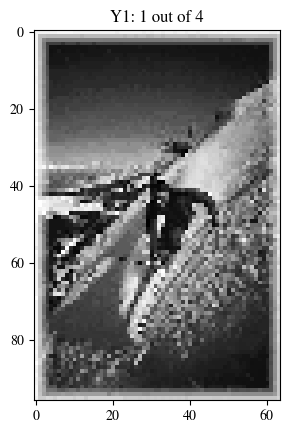

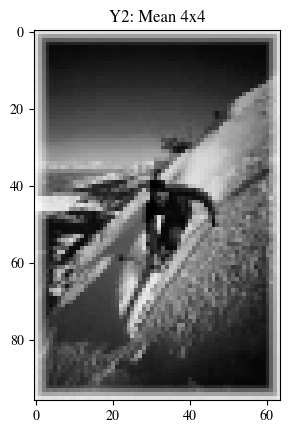

In [26]:
"""
Image Resolution:
a.	Reduce the resolution of 7_1.asc by a factor of 4 in both horizontal and vertical dimensions, e.g., if the original image is 400 by 400, then result shall be 100 by 100) to create a decimated image using two different methods: 

HINT: To read in an “.asc”, : X=np.loadtxt('7_1.asc'). 

i.	Keep one pixel out of every 4x4 pixel area. Display the resulting image Y1. 
ii.	Replace every 4x4 pixel area in 7_1.asc by the average value of the pixel values in that region. Display the resulting image Y2.

b.	Enlarge Image Y1 by a factor of 4 in both horizontal and vertical dimensions (e.g., from 100 by 100 to 400 by 400) using:

i.	Pixel repeating (zero order hold).  
ii.	Bilinear interpolation (do not use built-in interpolation function, use your own code). 
             
Keep the result images from (b.i) and (b.ii) the same size as 7_1.asc, compare the images. Compare the quality of the linear interpolation result to the zero-order hold result. Point out regions where they differ and try to justify this difference by estimating the local frequency content. In other words, look for regions of “low-frequency” content and “high-frequency” content and see how the interpolation quality is dependent on this factor. A couple of questions to think about: Are edges low frequency or high frequency features? Is the background a low frequency or high frequency feature?
"""

# a)
X = np.loadtxt("7_1.asc")

# i. Keep one pixel out of every 4x4 pixel area. Display the resulting image Y1.
Y1 = X[::4, ::4]

plt.imshow(Y1, cmap="gray")
plt.title("Y1: 1 out of 4")
plt.show()

# ii. Replace every 4x4 pixel area in 7_1.asc by the average value of the pixel values in that region. Display the resulting image Y2.
Y2 = np.zeros([X.shape[0] // 4, X.shape[1] // 4])
for i in range(Y2.shape[0]):
    for j in range(Y2.shape[1]):
        Y2[i, j] = np.mean(X[4 * i : 4 * (i + 1), 4 * j : 4 * (j + 1)])

plt.imshow(Y2, cmap="gray")
plt.title("Y2: Mean 4x4")
plt.show()

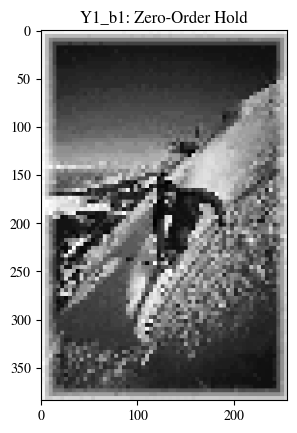

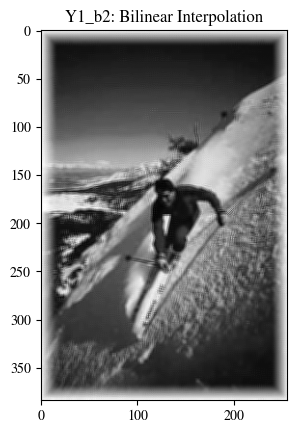

In [138]:
# b)

# i. Pixel repeating (zero order hold).
Y1_b1 = np.zeros([X.shape[0], X.shape[1]])

for i in range(Y1_b1.shape[0]):
    for j in range(Y1_b1.shape[1]):
        Y1_b1[i, j] = Y1[i // 4, j // 4]

plt.imshow(Y1_b1, cmap="gray")
plt.title("Y1_b1: Zero-Order Hold")
plt.show()

# ii. Bilinear interpolation (do not use built-in interpolation function, use your own code).
def bilinear_interpolation(img, x, y, x1, y1, x2, y2):
    if x1 == x2 or y1 == y2:
        return img[y1, x1]

    x = min(max(x, x1), x2)
    y = min(max(y, y1), y2)

    R1 = (x2 - x) / (x2 - x1) * img[y1, x1] + (x - x1) / (x2 - x1) * img[y1, x2]
    R2 = (x2 - x) / (x2 - x1) * img[y2, x1] + (x - x1) / (x2 - x1) * img[y2, x2]
    return (y2 - y) / (y2 - y1) * R1 + (y - y1) / (y2 - y1) * R2

# Create an empty output image
Y1_b2 = np.zeros([X.shape[0], X.shape[1]])
Y1_b2[::4, ::4] = Y1

# Perform bilinear interpolation for each pixel
for i in range(Y1_b2.shape[0]):
    for j in range(Y1_b2.shape[1]):
        x, y = j, i  # Coordinates in Y1_b2
        x1, y1 = max(0, x - 1), max(0, y - 1)  # Top-left
        x2, y2 = min(Y1_b2.shape[1] - 1, x + 1), min(
            Y1_b2.shape[0] - 1, y + 1
        )  # Bottom-right
        Y1_b2[i, j] = bilinear_interpolation(X, x, y, x1, y1, x2, y2)

# Display the interpolated image
plt.imshow(Y1_b2, cmap="gray")
plt.title("Y1_b2: Bilinear Interpolation")
plt.show()

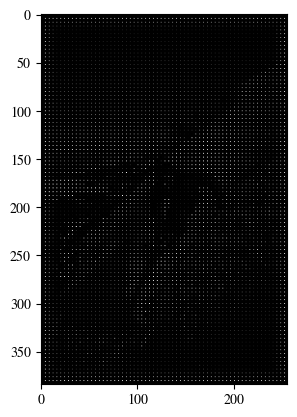

In [167]:
Y1_b2 = np.zeros([X.shape[0], X.shape[1]])
Y1_b2[::4, ::4] = Y1
plt.imshow(Y1_b2, cmap="gray")
plt.show()

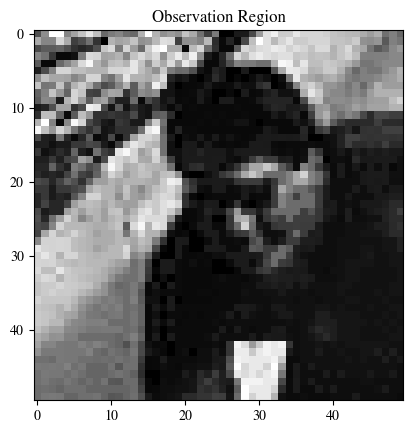

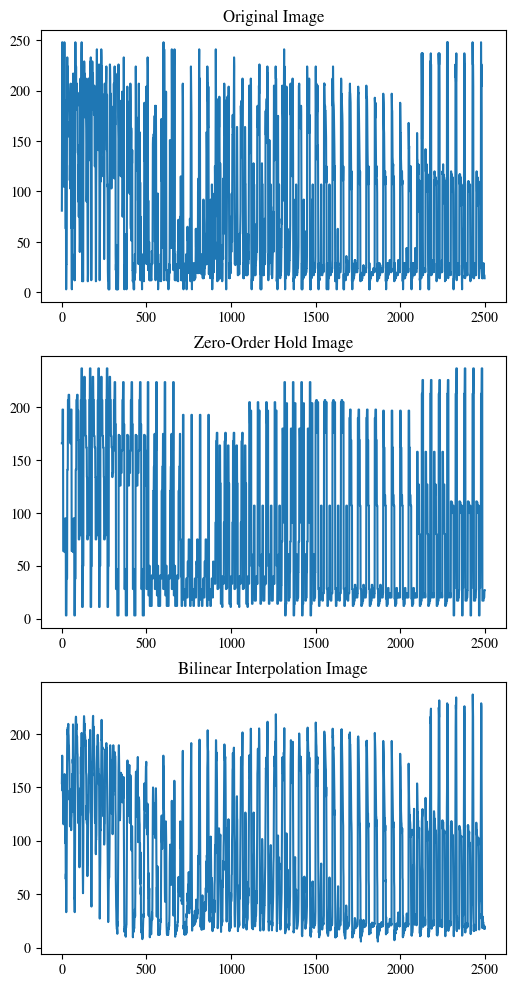

In [166]:
# Let observation indices be 150:250, 100:150 (x1:x2, y1:y2)
r1, r2 = 150, 200
c1, c2 = 100, 150

plt.imshow(X[r1:r2, c1:c2], cmap="gray")
plt.title("Observation Region")
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Display the original image region as a signal
axs[0].plot(X[r1:r2, c1:c2].flatten())
axs[0].set_title("Original Image")

# Display the zero-order hold image region as a signal
axs[1].plot(Y1_b1[r1:r2, c1:c2].flatten())
axs[1].set_title("Zero-Order Hold Image")

# Display the bilinear interpolation image region as a signal
axs[2].plot(Y1_b2[r1:r2, c1:c2].flatten())
axs[2].set_title("Bilinear Interpolation Image")

plt.show()

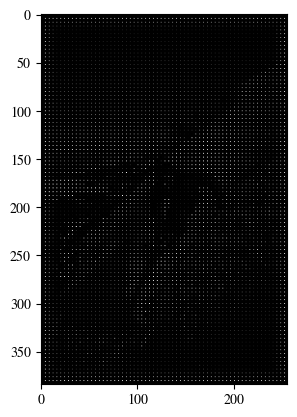

In [133]:
plt.imshow(Y1_b2, cmap="gray")